In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_vietnam = pd.read_excel(r'alldatasets.xlsx',sheet_name='Vietnam')

In [3]:
df_vietnam.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,VN011001,Vietnam,170.000000,1,12.0,-0.493371,5.0,NaN,12.0,1,91,5,0.561111,1,1,0.0,0.000000
1,VN011002,Vietnam,153.500000,1,12.0,-0.795860,15.0,3.0,9.0,0,92,6,0.546296,1,1,0.0,0.000000
2,VN011003,Vietnam,158.000000,1,8.0,-1.421140,5.0,7.0,6.0,0,100,5,0.455556,2,1,19200000.0,875.313416
3,VN011004,Vietnam,157.500000,0,12.0,-0.539453,10.0,0.0,9.0,0,94,6,0.592593,5,1,4600000.0,209.710495
4,VN011005,Vietnam,157.600006,0,16.0,-0.297198,10.0,4.0,0.0,0,95,5,0.466667,5,1,2800000.0,127.649872


In [4]:
df_vietnam.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

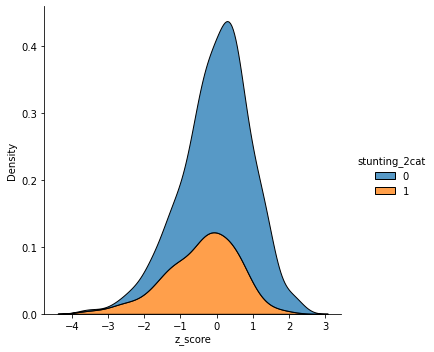

In [6]:
import seaborn as sns
sns.displot(df_vietnam, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_vietnam[['height']]
X = df_vietnam[['stunting_2cat']]

In [8]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=153.2, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=6.7)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_vietnam, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 22 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,162.611,0.310,162.013,163.180,0.005,0.003,4053.0,4053.0,4054.0,4191.0,1.0
stunting_2cat,-5.025,0.567,-6.027,-3.913,0.009,0.006,4124.0,4124.0,4135.0,4078.0,1.0
sd,7.290,0.188,6.923,7.630,0.002,0.002,6316.0,6316.0,6274.0,3600.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

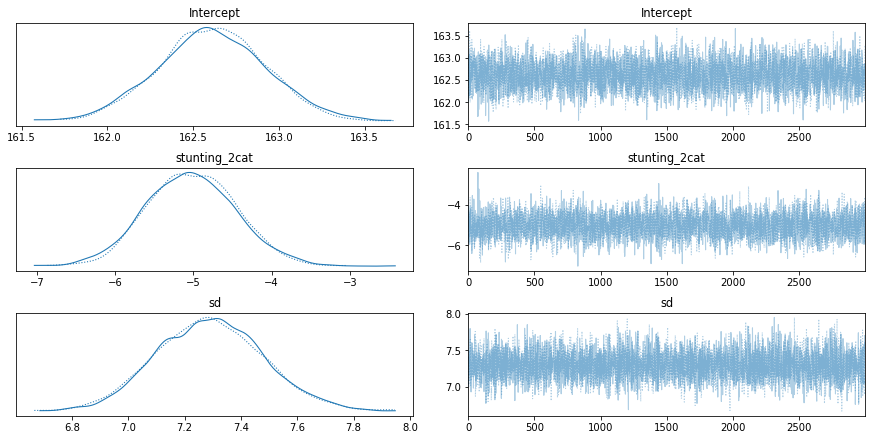

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_vietnam['height']
X = df_vietnam[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=153.2, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=6.7),
        'agegapr1': pm.Normal.dist(mu=1, sigma=6.7),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=6.7),
        'chsexr1': pm.Normal.dist(mu=1, sigma=6.7),
        'agemonr1': pm.Normal.dist(mu=1, sigma=6.7),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=6.7),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=6.7)
        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_vietnam, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=1000, chains = 2, tune = 2000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 83 seconds.


In [17]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,158.821,4.519,150.276,167.078,0.148,0.105,929.0,929.0,929.0,1201.0,1.01
stunting_2cat,-5.689,0.404,-6.422,-4.907,0.010,0.007,1709.0,1705.0,1712.0,1391.0,1.00
agegapr1,-0.008,0.063,-0.120,0.113,0.001,0.002,2186.0,694.0,2219.0,1211.0,1.00
momeduyrsr1,0.066,0.051,-0.026,0.158,0.001,0.001,1930.0,1827.0,1942.0,1581.0,1.00
chsexr1,11.068,0.373,10.364,11.748,0.008,0.006,2140.0,2123.0,2138.0,1412.0,1.00
agemonr1,-0.007,0.047,-0.094,0.082,0.002,0.001,930.0,930.0,931.0,1119.0,1.00
wi_newr1,-0.475,0.955,-2.391,1.221,0.021,0.020,1979.0,1100.0,1993.0,1340.0,1.00
hhsizer1,-0.174,0.118,-0.421,0.028,0.003,0.002,1979.0,1741.0,1974.0,1546.0,1.00
sd,4.852,0.129,4.592,5.074,0.003,0.002,2236.0,2232.0,2239.0,1576.0,1.00


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

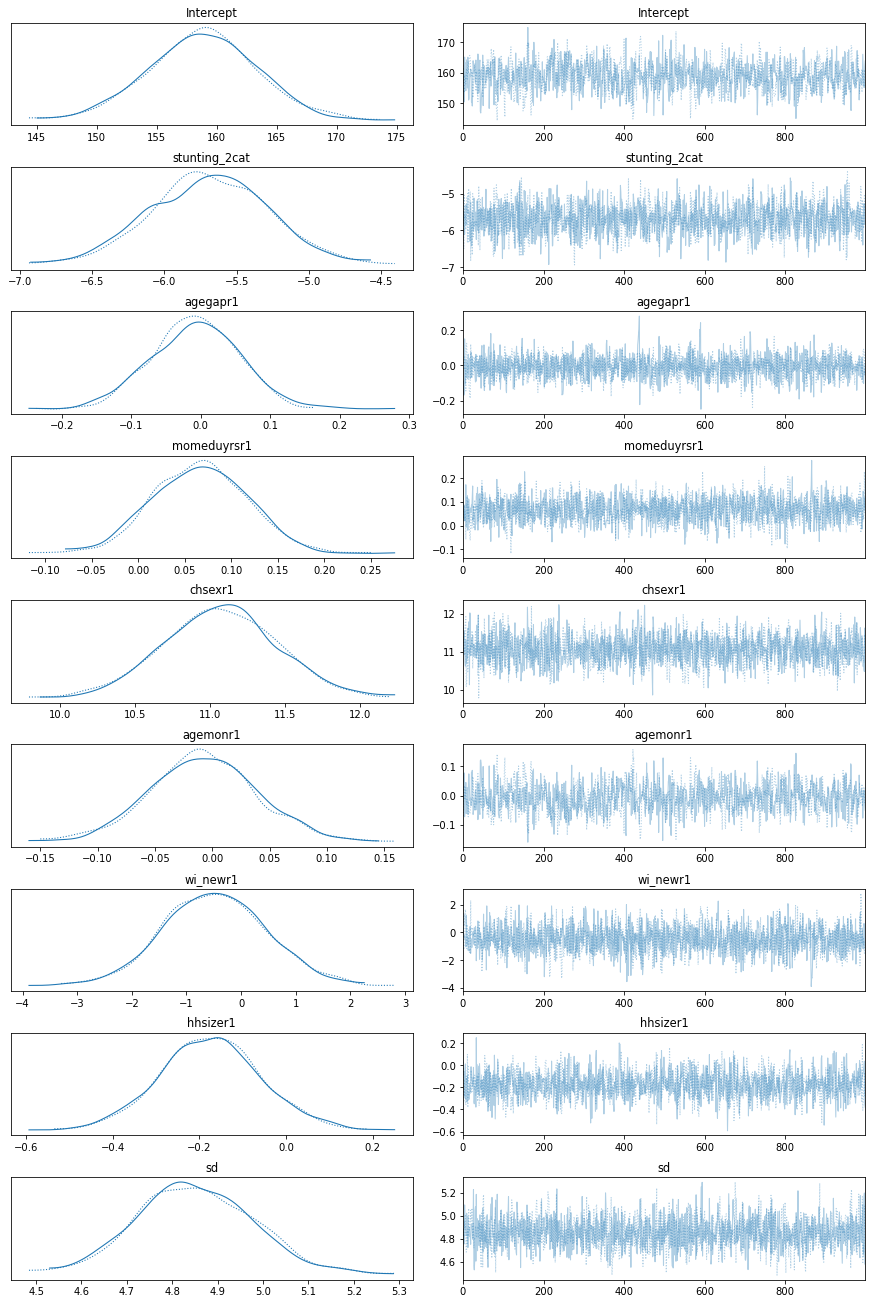

In [18]:
az.plot_trace(normal_trace)

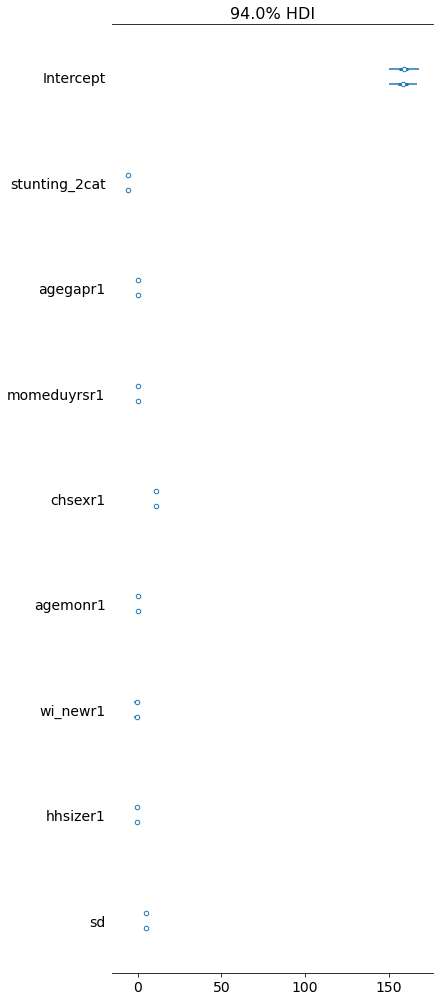

In [19]:
az.plot_forest(normal_trace);